In [1]:
# importing the keras librareis and packages

import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.layers import Softmax
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [ ]:
import splitfolders
splitfolders.ratio("featured", output="dataset", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 792 files [00:02, 353.54 files/s]


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/identity/dataset/train',
    target_size=(160, 160),
    batch_size=60,
    class_mode='sparse')

val_set = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/identity/dataset/val',
    target_size=(160, 160),
    batch_size=5,
    class_mode='sparse')

Found 630 images belonging to 10 classes.
Found 75 images belonging to 10 classes.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from keras.models import load_model
base_model = load_model('/content/drive/MyDrive/identity/facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [17]:
base_model.layers.pop()
for layer in base_model.layers:
  layer.trainable = True

x = base_model.output
x = Dense(32)(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                                            

####Different batch sizes
|Batch size|Training accuracy|
|-|-|
|30|0.1159|
|60|0.1286|

#### Xception preprocessing
|Preprocessing|Training accuracy|
|-|-|
|No|0.1159|
|Yes|0.1381|

In [ ]:
import matplotlib.pyplot as plt
for layer in base_model.layers:
    layer.trainable=True

#optimizer = SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
optimizer = Adam(learning_rate=0.000001)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer, metrics=["accuracy"])
epochs = 40

checkpoint = ModelCheckpoint("best_model.h5", monitor='loss', 
    save_best_only=True, mode='auto', save_freq=1)


training = model.fit(training_set, 
                      validation_data=val_set, 
                      epochs=epochs,
                      callbacks=[checkpoint])

import matplotlib.pyplot as plt
import numpy

# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/40


KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


11/11 [==============================] - 252s 14s/step - loss: 2.9285 - accuracy: 0.1286 - val_loss: 3.0627 - val_accuracy: 0.1067
Epoch 2/40
11/11 [==============================] - 153s 14s/step - loss: 2.7910 - accuracy: 0.1397 - val_loss: 3.0466 - val_accuracy: 0.0800
Epoch 3/40
11/11 [==============================] - 152s 14s/step - loss: 2.7432 - accuracy: 0.1429 - val_loss: 3.0668 - val_accuracy: 0.0800
Epoch 4/40
11/11 [==============================] - 160s 14s/step - loss: 2.6408 - accuracy: 0.1381 - val_loss: 2.9770 - val_accuracy: 0.0533


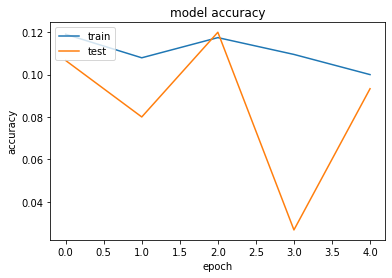

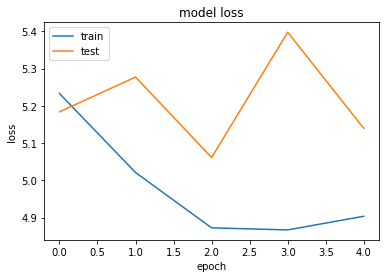

In [ ]:
import matplotlib.pyplot as plt
import numpy

# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()